# 主成分分析

In [1]:
# -*- coding: utf-8 -*-
# リスト 3-8 iris の主成分分析のプログラム例
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [5]:
colors = ['red', 'blue', 'green' ]
markers = ['x', 'point', 'plus' ]
# データを準備
iris = load_iris()  # scikit-learnのデータライブラリからirisを読み込む
species = ['Setosa', 'Versicolour', 'Virginica']

In [8]:
# データ部分を取り出す
irisdata = pd.DataFrame(iris.data, columns=iris.feature_names)
# どの種かの情報を取り出す
iristarget = pd.DataFrame(iris.target, columns=['target'])
irispd = pd.concat([irisdata, iristarget], axis=1)  # 結合する
pca = PCA(n_components = 4)       # PCAクラスのインスタンス生成、成分数を4にする
pca.fit(irisdata)                 # データ部分だけを主成分分析に与えて解析する

print('主成分', pca.components_)  # 結果を表示
print('平均', pca.mean_)
print('分散', pca.explained_variance_ )
print('寄与率', pca.explained_variance_ratio_)
print('累積寄与率', np.cumsum(pca.explained_variance_ratio_))

主成分 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
平均 [5.84333333 3.054      3.75866667 1.19866667]
分散 [4.22484077 0.24224357 0.07852391 0.02368303]
寄与率 [0.92461621 0.05301557 0.01718514 0.00518309]
累積寄与率 [0.92461621 0.97763178 0.99481691 1.        ]


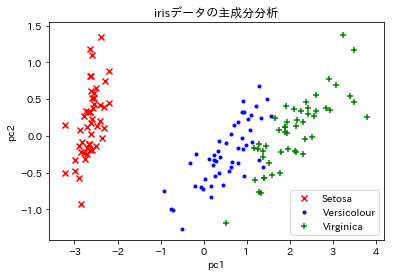

In [3]:
# 主成分に変換したデータ点をプロットする。表示色を変えるために種ごとに分けて処理する
transformed0 = pca.transform(irisdata[irispd.target==0])
transformed1 = pca.transform(irisdata[irispd.target==1])
transformed2 = pca.transform(irisdata[irispd.target==2])
# scatterメソッドは、xとyを位置の揃った別のリストとして受け取るので、合うように加工
plt.scatter([u[0] for u in transformed0], [u[1] for u in transformed0], c='red', \
             label=species[0], marker='x')
plt.scatter([u[0] for u in transformed1], [u[1] for u in transformed1], c='blue', \
    label=species[1], marker='.')
plt.scatter([u[0] for u in transformed2], [u[1] for u in transformed2], c='green', \
    label=species[2], marker='+')
plt.title('irisデータの主成分分析')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()